In [ ]:
practical no 4= to build and evaluate a decision tree model for classification tasks and study thr effects of tree depth splitting criteria

Harshita Patle

In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path="/content/drive/MyDrive/ML_Dataset/daily_weather.csv"
df=pd.read_csv(path)
df.head(5)

,number,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am,relative_humidity_3pm
0,0,918.060000,74.822000,271.100000,2.080354,295.400000,2.863283,0.0,0.0,42.420000,36.160000
1,1,917.347688,71.403843,101.935179,2.443009,140.471548,3.533324,0.0,0.0,24.328697,19.426597
2,2,923.040000,60.638000,51.000000,17.067852,63.700000,22.100967,0.0,20.0,8.900000,14.460000
3,3,920.502751,70.138895,198.832133,4.337363,211.203341,5.190045,0.0,0.0,12.189102,12.742547
4,4,921.160000,44.294000,277.800000,1.856660,136.500000,2.863283,8.9,14730.0,92.410000,76.740000


In [ ]:
df.columns

Index(['number', 'air_pressure_9am', 'air_temp_9am', 'avg_wind_direction_9am',
       'avg_wind_speed_9am', 'max_wind_direction_9am', 'max_wind_speed_9am',
       'rain_accumulation_9am', 'rain_duration_9am', 'relative_humidity_9am',
       'relative_humidity_3pm'],
      dtype='object')

In [ ]:
df.shape

(1095, 11)

In [ ]:
df.isnull().any().any()

np.True_

In [ ]:
df.isnull().sum()

,0
number,0
air_pressure_9am,3
air_temp_9am,5
avg_wind_direction_9am,4
avg_wind_speed_9am,3
max_wind_direction_9am,3
max_wind_speed_9am,4
rain_accumulation_9am,6
rain_duration_9am,3
relative_humidity_9am,0


In [ ]:
df[df.isnull().any(axis = 1)]

,number,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am,relative_humidity_3pm
16,16,917.890000,NaN,169.200000,2.192201,196.800000,2.930391,0.000,0.000000,48.990000,51.190000
111,111,915.290000,58.820000,182.600000,15.613841,189.000000,NaN,0.000,0.000000,21.500000,29.690000
177,177,915.900000,NaN,183.300000,4.719943,189.900000,5.346287,0.000,0.000000,29.260000,46.500000
262,262,923.596607,58.380598,47.737753,10.636273,67.145843,13.671423,0.000,NaN,17.990876,16.461685
277,277,920.480000,62.600000,194.400000,2.751436,NaN,3.869906,0.000,0.000000,52.580000,54.030000
334,334,916.230000,75.740000,149.100000,2.751436,187.500000,4.183078,NaN,1480.000000,31.880000,32.900000
358,358,917.440000,58.514000,55.100000,10.021491,NaN,12.705819,0.000,0.000000,13.880000,25.930000
361,361,920.444946,65.801845,49.823346,21.520177,61.886944,25.549112,NaN,40.364018,12.278715,7.618649
381,381,918.480000,66.542000,90.900000,3.467257,89.400000,4.406772,NaN,0.000000,20.640000,14.350000
409,409,NaN,67.853833,65.880616,4.328594,78.570923,5.216734,0.000,0.000000,18.487385,20.356594


In [ ]:
del df ['number']
df.columns

Index(['air_pressure_9am', 'air_temp_9am', 'avg_wind_direction_9am',
       'avg_wind_speed_9am', 'max_wind_direction_9am', 'max_wind_speed_9am',
       'rain_accumulation_9am', 'rain_duration_9am', 'relative_humidity_9am',
       'relative_humidity_3pm'],
      dtype='object')

In [ ]:
df.shape

(1095, 10)

In [ ]:
before_rows = df.shape[0]
df = df.dropna()
after_rows = df.shape[0]
before_rows - after_rows

print("Before rows:",before_rows)
print("After rows:",after_rows)
print("the number of dropped rows are:",before_rows - after_rows)

Before rows: 1095
After rows: 1064
the number of dropped rows are: 31


In [ ]:
df.shape

(1064, 10)

In [ ]:
clean_data = df.copy()
clean_data['high_humidity_label'] = (clean_data['relative_humidity_3pm'] > 24.99)*1
print(clean_data['high_humidity_label'])

0       1
1       0
2       0
3       0
4       1
       ..
1090    1
1091    1
1092    1
1093    1
1094    0
Name: high_humidity_label, Length: 1095, dtype: int64


In [ ]:
clean_data.columns

Index(['air_pressure_9am', 'air_temp_9am', 'avg_wind_direction_9am',
       'avg_wind_speed_9am', 'max_wind_direction_9am', 'max_wind_speed_9am',
       'rain_accumulation_9am', 'rain_duration_9am', 'relative_humidity_9am',
       'relative_humidity_3pm', 'high_humidity_label'],
      dtype='object')

In [ ]:
del clean_data['relative_humidity_9am']
del clean_data['relative_humidity_3pm']
clean_data.columns

Index(['air_pressure_9am', 'air_temp_9am', 'avg_wind_direction_9am',
       'avg_wind_speed_9am', 'max_wind_direction_9am', 'max_wind_speed_9am',
       'rain_accumulation_9am', 'rain_duration_9am', 'high_humidity_label'],
      dtype='object')

In [ ]:
x=clean_data.iloc[:,:-1]
print(x)

      air_pressure_9am  air_temp_9am  avg_wind_direction_9am  \
0           918.060000     74.822000              271.100000   
1           917.347688     71.403843              101.935179   
2           923.040000     60.638000               51.000000   
3           920.502751     70.138895              198.832133   
4           921.160000     44.294000              277.800000   
...                ...           ...                     ...   
1090        918.900000     63.104000              192.900000   
1091        918.710000     49.568000              241.600000   
1092        916.600000     71.096000              189.300000   
1093        912.600000     58.406000              172.700000   
1094        921.530000     77.702000               97.100000   

      avg_wind_speed_9am  max_wind_direction_9am  max_wind_speed_9am  \
0               2.080354              295.400000            2.863283   
1               2.443009              140.471548            3.533324   
2              

In [ ]:
y = clean_data['high_humidity_label']
print(y)

0       1
1       0
2       0
3       0
4       1
       ..
1090    1
1091    1
1092    1
1093    1
1094    0
Name: high_humidity_label, Length: 1095, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size= 0.7,test_size = 0.3,random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

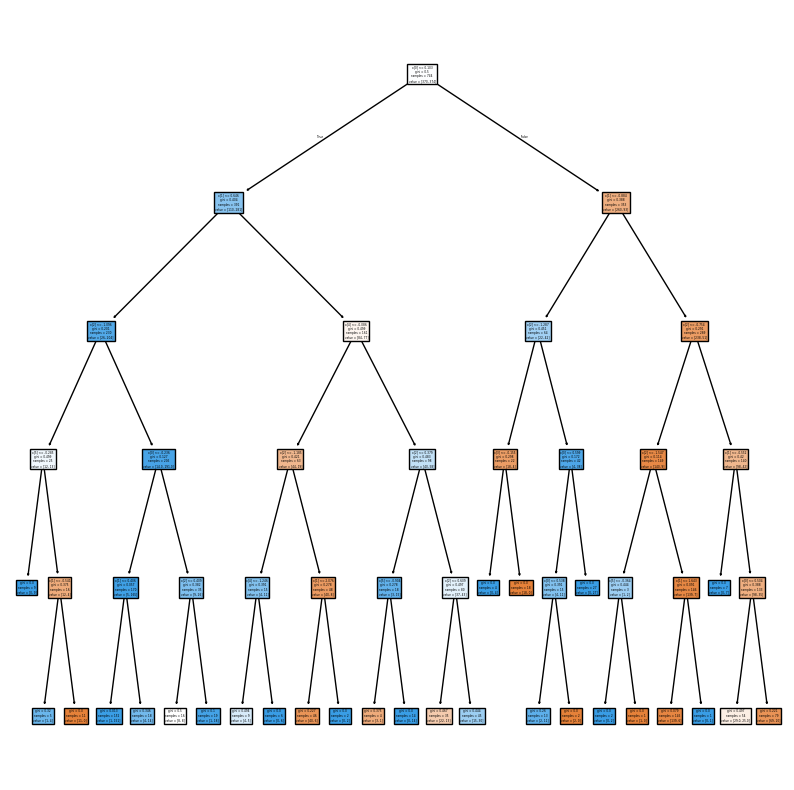

In [ ]:
import matplotlib.pyplot as plt
from sklearn import tree

humidity_classifier = DecisionTreeClassifier(max_depth=5, random_state=42)
humidity_classifier.fit(x_train, y_train)

plt.figure(figsize=(10,10))
tree.plot_tree(humidity_classifier, filled=True)
plt.show()

In [ ]:
from sklearn.metrics import classification_report

y_pred = humidity_classifier.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.85      0.82       165
           1       0.83      0.75      0.79       155

    accuracy                           0.81       320
   macro avg       0.81      0.80      0.81       320
weighted avg       0.81      0.81      0.81       320

